In [0]:
import tensorflow as tf
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import argparse
import pdb
import easydict
from tqdm.notebook import tqdm
import os

In [0]:
def str2bool(v):
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

In [0]:
def plot_img(epoch, status, img_output, img_GT):
    plt.figure(figsize=(12,3))
    
    noise = tf.keras.layers.GaussianNoise(0.1, input_shape=(32, 32, 3))
    
    noise_input = np.expand_dims(img_GT, 0)
    noise_input = noise(noise_input, training=True)
    noise_input = noise_input[0]

    plt.subplot(1,3,1)
    img_GT = np.array(img_GT)
    plt.imshow((img_GT*255).astype(np.uint8))
    plt.xlabel("{}, GT, Epoch: {}".format(status, epoch+1))
    
    plt.subplot(1,3,2)
    noise_input = np.array(noise_input)
    plt.imshow((noise_input*255).astype(np.uint8))
    plt.xlabel("{}, Noise Input, Epoch: {}".format(status, epoch+1))
    
    plt.subplot(1,3,3)
    img_output = np.array(img_output)
    plt.imshow((img_output*255).astype(np.uint8))
    plt.xlabel("{}, Output, Epoch: {}".format(status, epoch+1))
    
    plt.show()

In [0]:
class DeNoise(Model):
	def __init__(self):
		super(DeNoise, self).__init__()
		self.conv1 = tf.keras.layers.Conv2D(64, 3, padding='same', activation=None)
		self.conv2 = tf.keras.layers.Conv2D(64, 3, padding='same', activation=None)
		self.conv3 = tf.keras.layers.Conv2D(64, 3, padding='same', activation=None)
		self.conv4 = tf.keras.layers.Conv2D(64, 3, padding='same', activation=None)
		self.last_conv = tf.keras.layers.Conv2D(3, 3, padding='same', activation=None)

		self.bn1 = tf.keras.layers.BatchNormalization()
		self.bn2 = tf.keras.layers.BatchNormalization()
		self.bn3 = tf.keras.layers.BatchNormalization()
		self.bn4 = tf.keras.layers.BatchNormalization()

		self.relu = tf.nn.relu
	
	def call(self, noise_input):
		x = self.conv1(noise_input)
		x = self.bn1(x)
		x = self.relu(x)

		x = self.conv2(x)
		x = self.bn2(x)
		x = self.relu(x)

		x = self.conv3(x)
		x = self.bn3(x)
		x = self.relu(x)

		x = self.conv4(x)
		x = self.bn4(x)
		x = self.relu(x)

		x = self.last_conv(x)
		x = x + noise_input

		return x

In [0]:
if __name__ == "__main__":
	parser = argparse.ArgumentParser()
	parser.add_argument('--epoch', type=int, default=1000, help='number of epochs')
	parser.add_argument('--batch', type=int, default=1000, help='batch size')
	parser.add_argument('--lr', type=float, default=0.001, help='learning rate')
	parser.add_argument('--log_step', type=int, default=1, help='step for printing log')
	parser.add_argument('--img_show', type=str2bool, default=False, help='Show images while training')
	parser.add_argument('--inference', type=str2bool, default=True, help='Running inference code')
	parser.add_argument('--inf_img', type=str, default='', help='Path of inference input image')
	parser.add_argument('--output', type=str, default='', help='Path of inference result')

	#args = parser.parse_args()
	args = easydict.EasyDict({
		'epoch' : 100,
		'batch' : 32,
		'lr' : 0.01,
		'log_step' : 5,
		'img_show' : True,
		'inference' : True,
		'inf_img' : './noisy.png',
		'output' : './'
	})

	epochs = args.epoch
	BATCH_SIZE = args.batch
	lr = args.lr
	log_step = args.log_step

In [6]:
	# Load Data
	cifar10 = tf.keras.datasets.cifar10
	(x_train, _), (x_test, _) = cifar10.load_data()
	x_train, x_test = x_train / 255.0, x_test / 255.0
	y_train, y_test = x_train, x_test

	# Generate Dataset
	train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(BATCH_SIZE)
	test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(BATCH_SIZE)

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
  # Generate Model
  model_3 = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.1, input_shape=(32, 32, 3)),
    DeNoise()
  ])

  # Set Loss Function & Optimizer
  loss = tf.keras.losses.MeanSquaredError()
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

  train_loss = tf.keras.metrics.Mean(name='train_loss')
  test_loss = tf.keras.metrics.Mean(name='test_loss')

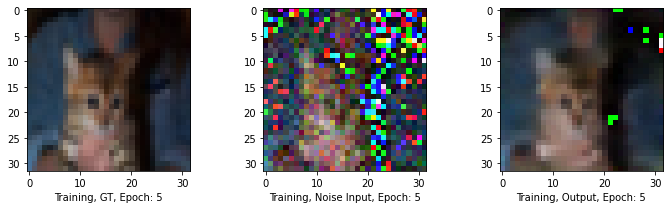

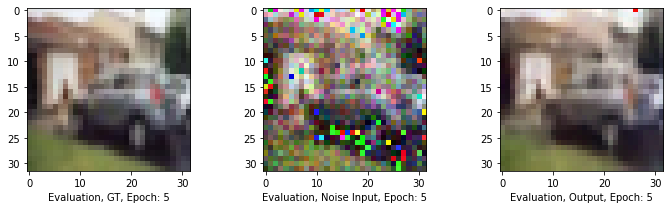

Epoch: 5 => train loss: 0.004844, test loss: 0.001597


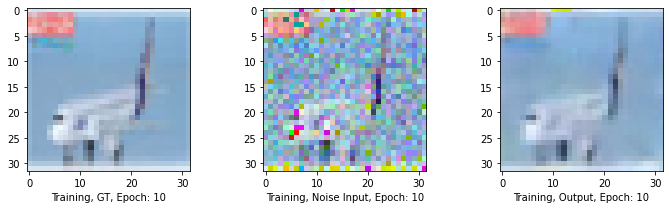

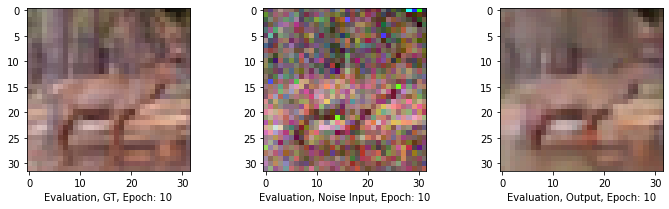

Epoch: 10 => train loss: 0.003241, test loss: 0.001549


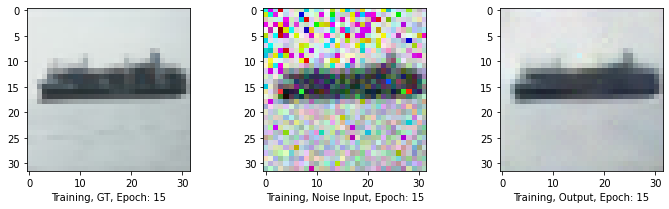

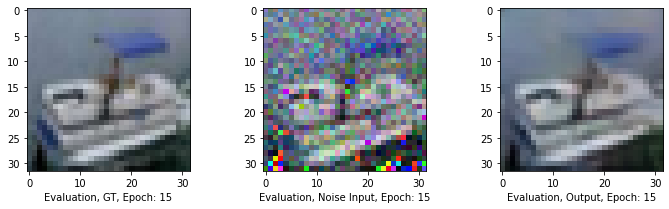

Epoch: 15 => train loss: 0.002645, test loss: 0.001506


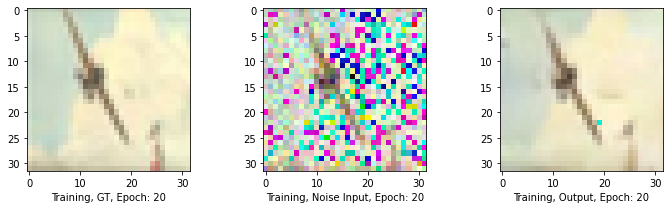

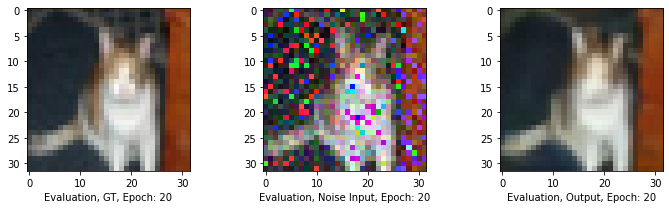

Epoch: 20 => train loss: 0.002338, test loss: 0.001483


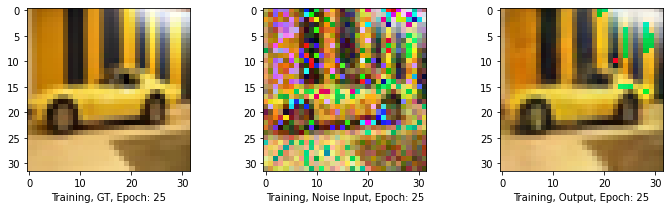

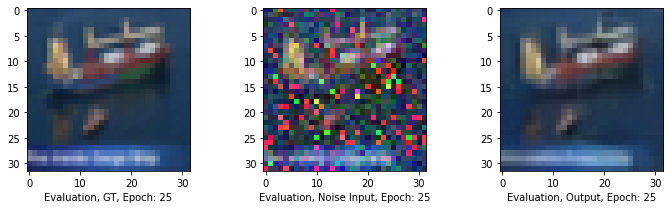

Epoch: 25 => train loss: 0.002151, test loss: 0.001466


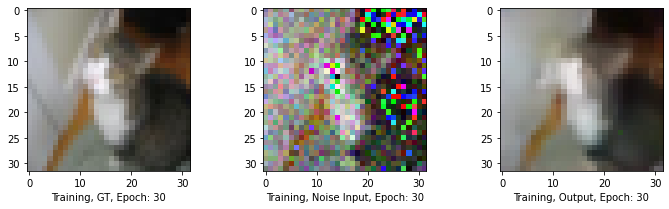

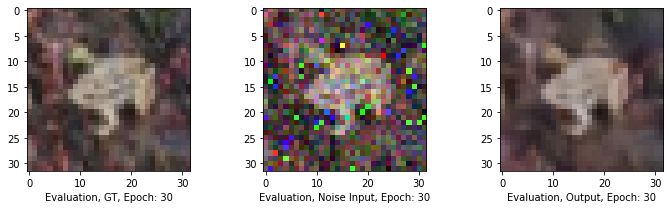

Epoch: 30 => train loss: 0.002027, test loss: 0.001456


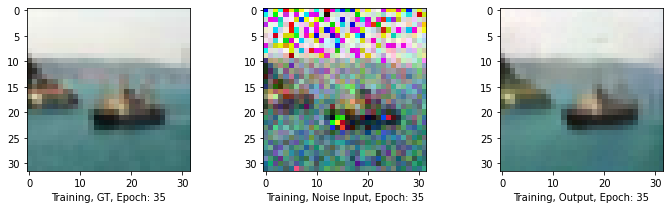

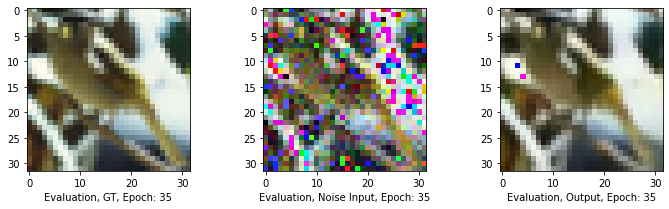

Epoch: 35 => train loss: 0.001938, test loss: 0.001447


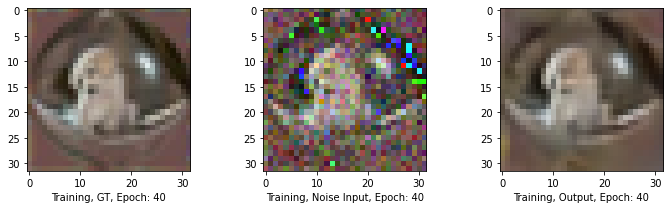

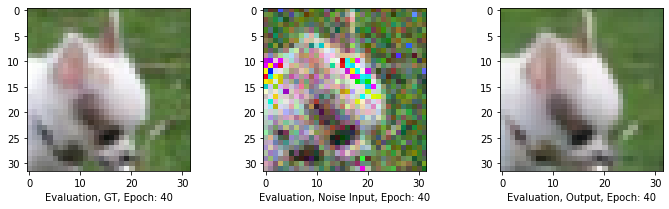

Epoch: 40 => train loss: 0.001870, test loss: 0.001439


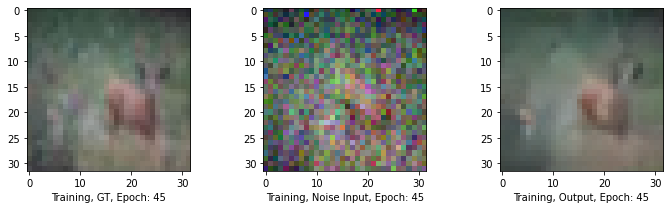

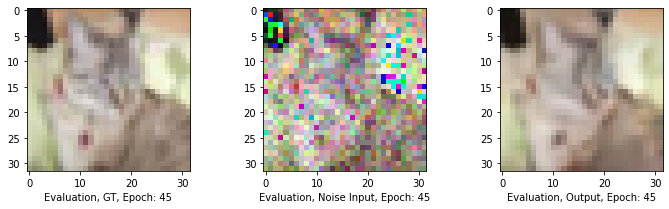

Epoch: 45 => train loss: 0.001818, test loss: 0.001434


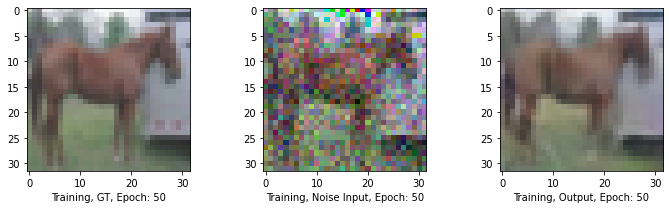

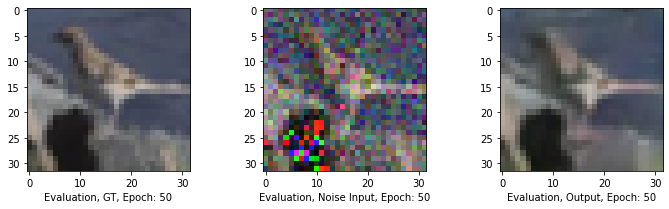

Epoch: 50 => train loss: 0.001777, test loss: 0.001432


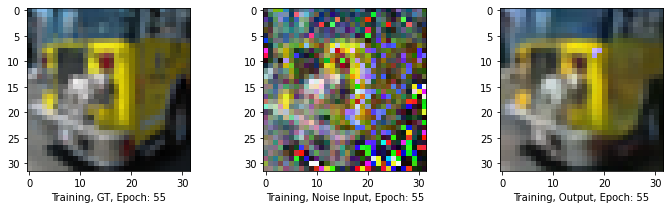

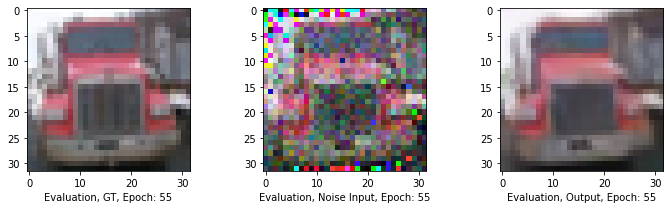

Epoch: 55 => train loss: 0.001743, test loss: 0.001430


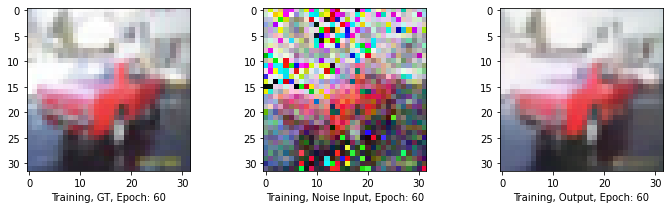

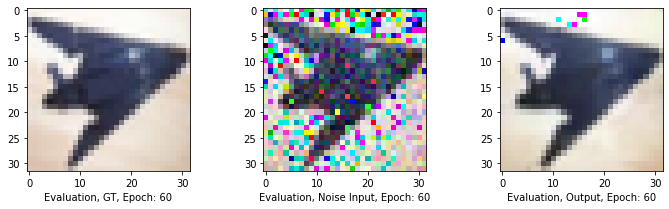

Epoch: 60 => train loss: 0.001715, test loss: 0.001429


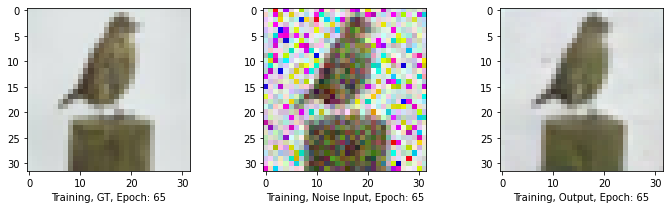

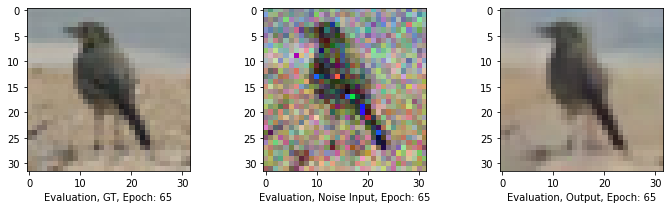

Epoch: 65 => train loss: 0.001690, test loss: 0.001428


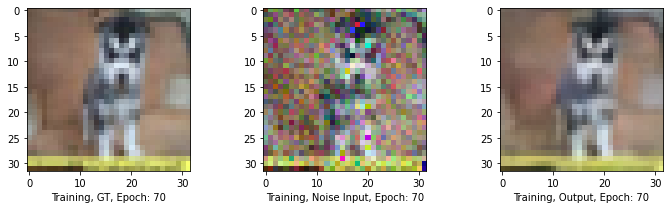

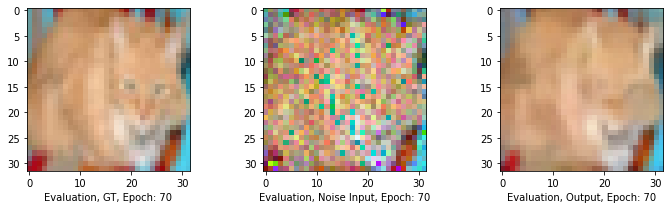

Epoch: 70 => train loss: 0.001670, test loss: 0.001425


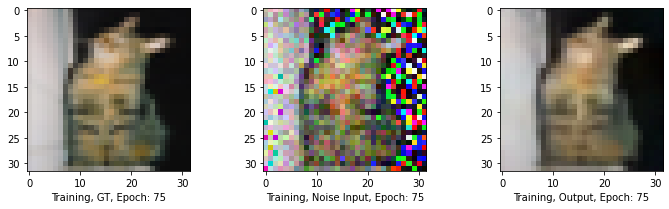

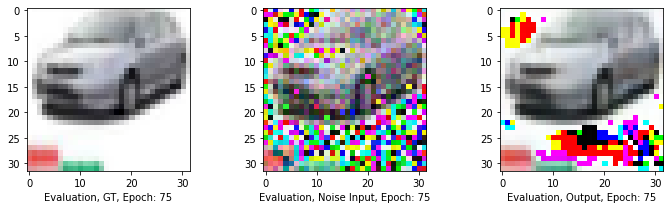

Epoch: 75 => train loss: 0.001651, test loss: 0.001423


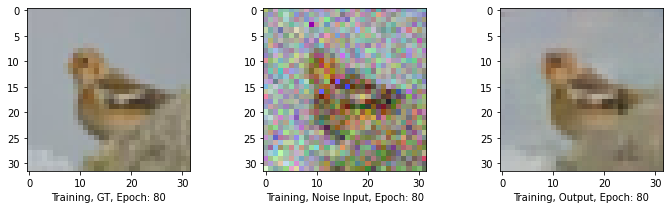

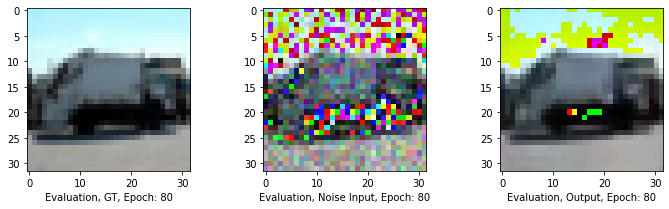

Epoch: 80 => train loss: 0.001635, test loss: 0.001422


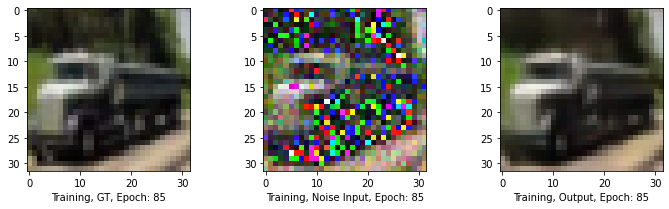

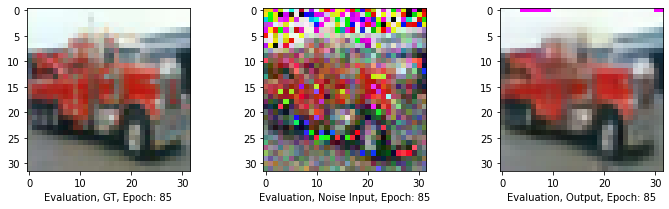

Epoch: 85 => train loss: 0.001621, test loss: 0.001421


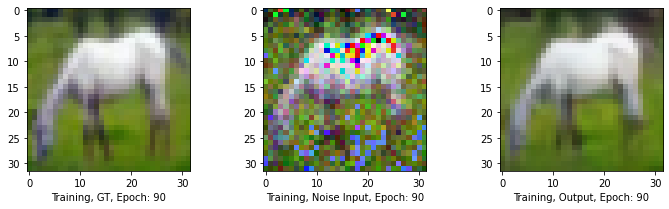

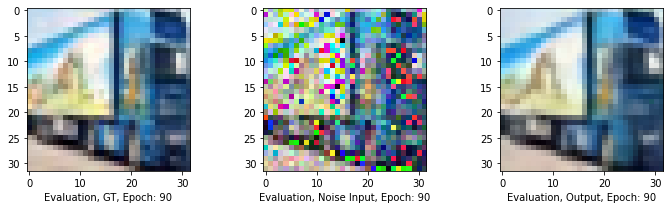

Epoch: 90 => train loss: 0.001609, test loss: 0.001419


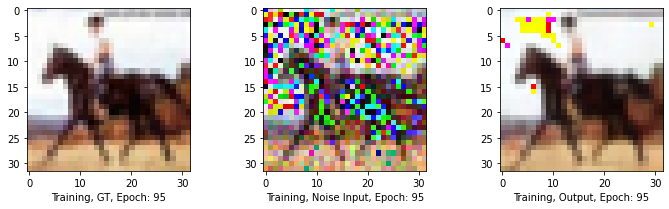

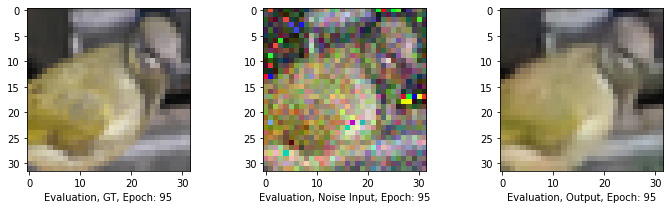

Epoch: 95 => train loss: 0.001597, test loss: 0.001417


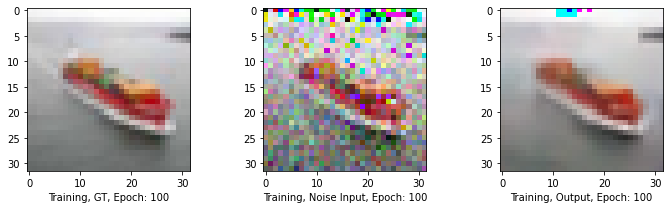

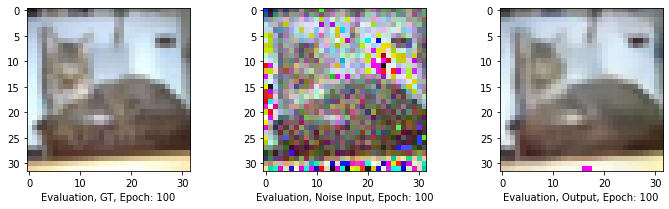

Epoch: 100 => train loss: 0.001587, test loss: 0.001416



In [8]:
	# Train & Evaluate
	tf.keras.backend.set_floatx('float64')
	for epoch in tqdm(range(epochs)):
		# Training
		for idx, (img_input, img_GT) in enumerate(train_dataset):
			with tf.GradientTape() as tape:
				img_output = model_3(img_input, training=True)
				t_loss = loss(img_GT, img_output)
			gradients = tape.gradient(t_loss, model_3.trainable_variables)
			optimizer.apply_gradients(zip(gradients, model_3.trainable_variables))

			train_loss(t_loss)
			if (epoch + 1) % args.log_step == 0 and idx == 0 and args.img_show:
				plot_img(epoch, 'Training', img_output[0], img_GT[0])


		if (epoch + 1) % args.log_step == 0:
			# Evaluation
			for idx, (test_img_input, test_img_GT) in enumerate(test_dataset):
				test_img_output = model_3(test_img_input, training=True)
				t_loss = loss(test_img_GT, test_img_output)

				test_loss(t_loss)
				if (epoch + 1) % args.log_step == 0 and idx == 0 and args.img_show:
					plot_img(epoch, 'Evaluation', test_img_output[0], test_img_GT[0])

			print('Epoch: %d => train loss: %.6f, test loss: %.6f'
					% (epoch+1, train_loss.result(), test_loss.result()))

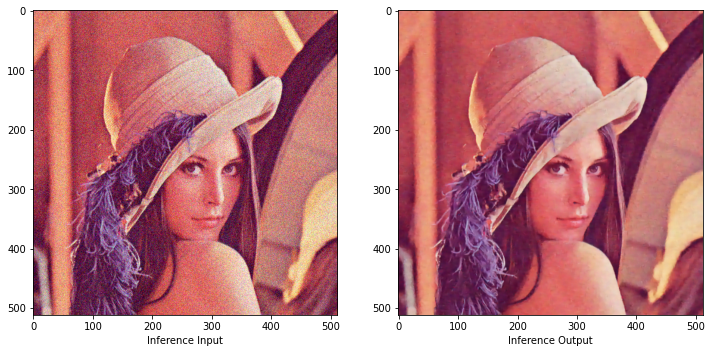

In [10]:
	# Inference
	if args.inference:
		inf_img_input = np.array(Image.open(args.inf_img))
		inf_img_input = np.expand_dims(inf_img_input, 0)
		inf_img_input = inf_img_input / 255.0

		inf_img_output = model_3(inf_img_input)

		if args.img_show:
			plt.figure(figsize=(12,6))
			plt.subplot(1,2,1) 
			plt.imshow((inf_img_input[0]*255).astype(np.uint8))
			plt.xlabel("Inference Input")

			inf_img_output = inf_img_output.numpy()
			plt.subplot(1,2,2)
			plt.imshow((inf_img_output[0]*255).astype(np.uint8))
			plt.xlabel("Inference Output")

		# Save Result
		inf_img_output = (inf_img_output[0]*255).astype(np.uint8)
		Image.fromarray(inf_img_output).save(args.output + 'result3.png')